<a href="https://www.kaggle.com/code/mostafahafez25/data-science-salaries-notebook?scriptVersionId=119648119" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: #307D7E; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">Data Science Job Salaries</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-job-salaries/ds_salaries.csv


In [2]:
!python -m pip install country_converter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for country_converter: filename=country_converter-0.8.0-py3-none-any.whl size=55658 sha256=052592f6816653ad2cff5cbb9b92288d398762699c5e25b47372bb6e7f584cad
  Stored in directory: /root/.cache/pip/wheels/ac/ef/42/232d7f54c493023bbf8710c3ab50939d833a2e4062afd0dea3
Successfully built country_converter


<iframe src="https://www.kaggle.com/embed/varunsaikanuri/data-science-job-salaries-eda?cellIds=39&kernelSessionId=107480695" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" 

![image](https://www.palermo.edu/Archivos_content/2021/negocios/julio/data/datascience-640.jpg)

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #20B2AA; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>Table of Contents📝</b></h3>
    
   * [1 - Import Libararies](#1)
   * [2 - Load Dataset](#2)
   * [3 - Data Wrangling](#3)
    - [3.1 - Missing Values](#3.1)
    - [3.2 - Data Formating](#3.2)
    - [3.3 - Delete Redundant Data](#3.3)
    - [3.4 - Duplicates](#3.4)
   * [4 - EDA](#4)
    - [4.1 - Univariante Analysis](#4.1)
    - [4.2 - Bivariante Analysis](#4.2)
    - [4.3 - Multivariante Analysis](#4.3)


<a id="1"></a>
## <h3 style="text-align: left;background-color: #20B2AA; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"> 1 - Import Libararies</h3>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
import country_converter as coco
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', None)
%matplotlib inline

<a id="2"></a>
## <h3 style='text-align : left; background-color:#20B2AA; font-family:newtimeroman; color:white; padding:14px; line-height:1; border-radius:10px'> 2 - Load Dataset</h3>

In [4]:
df = pd.read_csv('../input/data-science-job-salaries/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
df.shape

(607, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


<a id="3"></a>
## <h3 style='text-align:left; background-color:#20B2AA; font-family:newtimeroman; color:white; padding:14px; line-height:1; border-radius:10px'>3 - Data Wrangling</h3>

In [7]:
df.drop(columns=['Unnamed: 0', 'salary', 'salary_currency'], axis=1, inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


<a id="3.1"></a>
<h4 style='text-align:left; background-color:#43C6DB; font-family:newtimeroman; color:white; padding:13px; line-height:1; border-radius:10px'> 3.1 - Missing Values</h4>

Text(0.5, 1.0, 'Missing Data Distribution')

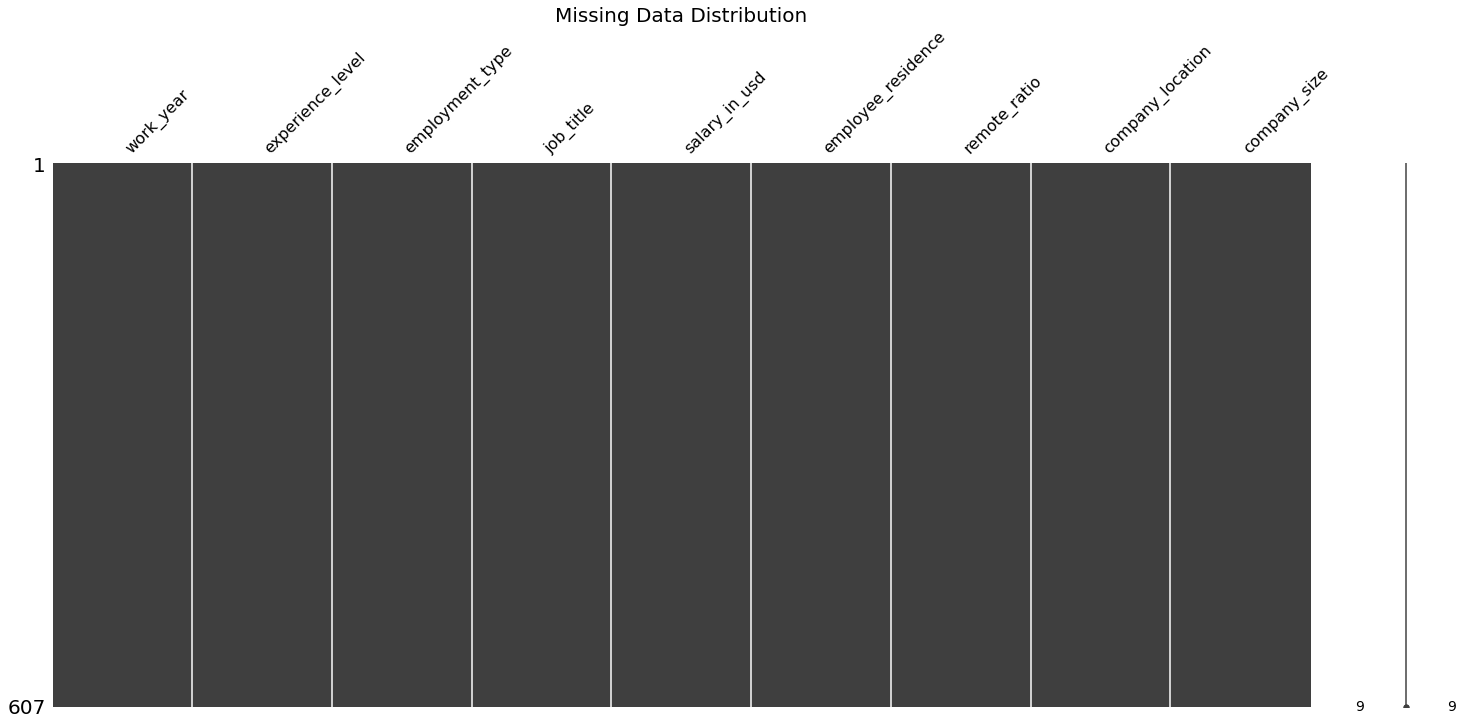

In [8]:
msno.matrix(df)
plt.title('Missing Data Distribution', fontsize= 20)

<a id="3.2"></a>
<h4 style='text-align:left; background-color:#43C6DB; font-family:newtimeroman; color:white; padding:13px; line-height:1; border-radius:10px'> 3.2 - Data Formating</h4>

In [9]:
df['experience_level'].replace({'EN':'Entry-Level', 'MI':'Intermediate-Level', 'SE':'Senior-Level', 'EX': 'Executive-Level'}, inplace=True)
df['employment_type'].replace({'FT':'Full-Time', 'PT':'Part-Time', 'CT':'Contract', 'FL':'Freelance'}, inplace=True)

<a id="3.3"></a>
<h4 style='text-align:left; background-color:#43C6DB; font-family:newtimeroman; color:white; padding:13px; line-height:1; border-radius:10px'> 3.3 - Delete Redundant Data</h4>

In [10]:
cols = ['work_year','company_location','company_size','job_title','experience_level','employment_type','employee_residence','remote_ratio','salary_in_usd' ]
df = df[cols]
df.head()

,work_year,company_location,company_size,job_title,experience_level,employment_type,employee_residence,remote_ratio,salary_in_usd
0,2020,DE,L,Data Scientist,Intermediate-Level,Full-Time,DE,0,79833
1,2020,JP,S,Machine Learning Scientist,Senior-Level,Full-Time,JP,0,260000
2,2020,GB,M,Big Data Engineer,Senior-Level,Full-Time,GB,50,109024
3,2020,HN,S,Product Data Analyst,Intermediate-Level,Full-Time,HN,0,20000
4,2020,US,L,Machine Learning Engineer,Senior-Level,Full-Time,US,50,150000


<a id="3.4"></a>
<h4 style='text-align:left; background-color:#43C6DB; font-family:newtimeroman; color:white; padding:13px; line-height:1; border-radius:10px'> 3.4 - Duplicates</h4>

In [11]:
df.duplicated().sum()

42

In [12]:
df.drop_duplicates()

,work_year,company_location,company_size,job_title,experience_level,employment_type,employee_residence,remote_ratio,salary_in_usd
0,2020,DE,L,Data Scientist,Intermediate-Level,Full-Time,DE,0,79833
1,2020,JP,S,Machine Learning Scientist,Senior-Level,Full-Time,JP,0,260000
2,2020,GB,M,Big Data Engineer,Senior-Level,Full-Time,GB,50,109024
3,2020,HN,S,Product Data Analyst,Intermediate-Level,Full-Time,HN,0,20000
4,2020,US,L,Machine Learning Engineer,Senior-Level,Full-Time,US,50,150000
...,...,...,...,...,...,...,...,...,...
602,2022,US,M,Data Engineer,Senior-Level,Full-Time,US,100,154000
603,2022,US,M,Data Engineer,Senior-Level,Full-Time,US,100,126000
604,2022,US,M,Data Analyst,Senior-Level,Full-Time,US,0,129000
605,2022,US,M,Data Analyst,Senior-Level,Full-Time,US,100,150000


<a id="4"></a>
## <h3 style='text-align:left; background-color:#20B2AA; font-family:newtimeroman; color:white; padding:14px; line-height:1; border-radius:10px'> 4 - EDA</h2>

In [13]:
df.describe(include='all')

,work_year,company_location,company_size,job_title,experience_level,employment_type,employee_residence,remote_ratio,salary_in_usd
count,607.000000,607,607,607,607,607,607,607.00000,607.000000
unique,NaN,50,3,50,4,4,57,NaN,NaN
top,NaN,US,M,Data Scientist,Senior-Level,Full-Time,US,NaN,NaN
freq,NaN,355,326,143,280,588,332,NaN,NaN
mean,2021.405272,NaN,NaN,NaN,NaN,NaN,NaN,70.92257,112297.869852
std,0.692133,NaN,NaN,NaN,NaN,NaN,NaN,40.70913,70957.259411
min,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,2859.000000
25%,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,50.00000,62726.000000
50%,2022.000000,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,101570.000000
75%,2022.000000,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,150000.000000


<a id="4.1"></a>
<h4 style='text-align:left; background-color:#43C6DB; font-family:newtimeroman; color:white; padding:13px; line-height:1; border-radius:10px'> 4.1 - Univariante Analysis</h4>

<h5 style='text-align:left; background-color:#4EE2EC; font-family:newtimeroman; color:white; padding:10px; line-height:1; border-radius:10px'>4.1.1 - Count of Jobs by Year</h5>

In [14]:
year = df['work_year'].value_counts()
fig = px.bar(year, x=year.index, y=year.values, color=year.index, template='ggplot2', title='Count of Jobs by Year')

fig.update_layout(font=dict(size=17))

fig.show()

<h5 style='text-align:left; background-color:#4EE2EC; font-family:newtimeroman; color:white; padding:10px; line-height:1; border-radius:10px'>4.1.2 - Percentage of Jobs by Company Size</h5>

In [15]:
size_c = df['company_size'].value_counts()
fig= px.pie(size_c, values=size_c.values, names=size_c.index, hole=0.7, title='Percentage of Jobs by Company Size')

fig.update_layout(font=dict(size=17))

fig.show()

<h5 style='text-align:left; background-color:#4EE2EC; font-family:newtimeroman; color:white; padding:10px; line-height:1; border-radius:10px'>4.1.3 - Top 10 Job Positions</h5>

In [16]:
#df_jts = df.sort_values(['job_title'], ascending=False)
job_title = df['job_title'].value_counts()[:10]
fig = px.bar(job_title, x= job_title.values, y= job_title.index, orientation='h', color=job_title.index, template='ggplot2', title='Top 10 Job Positions')

fig.update_layout(xaxis_title='Count', yaxis_title='Job Title', font=dict(size=15))

fig.show()

<h5 style='text-align:left; background-color:#4EE2EC; font-family:newtimeroman; color:white; padding:10px; line-height:1; border-radius:10px'>4.1.4 - Count of Job Positions by Experince Level</h5>

In [17]:
exp_level= df['experience_level'].value_counts()
fig = px.treemap(exp_level, path= [exp_level.index], values = exp_level.values, color=exp_level.index, template='ggplot2', title='Count of Job Positions by Experince Level')

fig.data[0].textinfo = 'label+value'
fig.update_layout(font= dict(size= 18))

fig.show()

<h5 style='text-align:left; background-color:#4EE2EC; font-family:newtimeroman; color:white; padding:10px; line-height:1; border-radius:10px'>4.1.5 - Percentage of Jobs Types</h5>

In [18]:
emp_type = df['employment_type'].value_counts()
fig = px.pie(emp_type, values=emp_type.values, names=emp_type.index, hole= 0.7, title='Percentage of Job Types')

fig.update_layout(font=dict(size=17))

fig.show()

<h5 style='text-align:left; background-color:#4EE2EC; font-family:newtimeroman; color:white; padding:10px; line-height:1; border-radius:10px'>4.1.6 - Percentage of Remote Jobs </h5>

In [19]:
labels= ['Fully Remote Work', 'No Remote Work', 'Partially Remote Work']
remote_ratio = df['remote_ratio'].value_counts()
fig = px.pie(emp_type, values=remote_ratio.values, names=labels, hole= 0.7, title='Percentage of Remote Jobs')

fig.update_layout(font=dict(size=17))

fig.show()

<h5 style='text-align:left; background-color:#4EE2EC; font-family:newtimeroman; color:white; padding:10px; line-height:1; border-radius:10px'>4.1.7 - Salary Distribution</h5>

In [20]:
fig = px.histogram(df, x='salary_in_usd', title='Salary Distribution')

fig.update_layout(xaxis_title='Salary (USD)', yaxis_title='Frequency',font=dict(size=17))

fig.show()

<h5 style='text-align:left; background-color:#4EE2EC; font-family:newtimeroman; color:white; padding:10px; line-height:1; border-radius:10px'>4.1.8 - Company Location Count</h5>

In [21]:
converted_country = coco.convert(names=df['company_location'], to='ISO3')
df['company_location'] = converted_country

loc_c= df['company_location'].value_counts()
fig = px.choropleth(locations= loc_c.index, color=loc_c.values, template='ggplot2', labels={'color':'Company Count'}, title='Company Location Count')
fig.update_layout(font=dict(size=17))

fig.show()

<h5 style='text-align:left; background-color:#4EE2EC; font-family:newtimeroman; color:white; padding:10px; line-height:1; border-radius:10px'>4.1.9 - Employee Residence Count</h5>

In [22]:
converted_res = coco.convert(names=df['employee_residence'], to='ISO3')
df['employee_residence'] = converted_res

loc_e= df['employee_residence'].value_counts()
fig = px.choropleth(locations= loc_e.index, color=loc_e.values, template='ggplot2', labels={'color':'Employee Count'}, title='Employee Residence Count')
fig.update_layout(font=dict(size=17))

fig.show()

<a id="4.2"></a>
<h4 style='text-align:left; background-color:#43C6DB; font-family:newtimeroman; color:white; padding:13px; line-height:1; border-radius:10px'> 4.2 - Bivariante Analysis</h4>

<h5 style='text-align:left; background-color:#4EE2EC; font-family:newtimeroman; color:white; padding:10px; line-height:1; border-radius:10px'>4.2.1 - Comparison of Top 10 Company and Employee Location</h5>

In [23]:
loc_c = df['company_location'].value_counts()[:10]
loc_e = df['employee_residence'].value_counts()[:10]

fig = go.Figure(data=[go.Bar(name='Company Location', x=loc_c.index , y=loc_c.values),
                     go.Bar(name='Employee Location', x=loc_e.index , y=loc_e.values)])

fig.update_layout(font=dict(size=17), barmode='group', xaxis_title='Country', yaxis_title='Count', title='Comparison of Top 10 Company and Employee Location')
fig.show()

<h5 style='text-align:left; background-color:#4EE2EC; font-family:newtimeroman; color:white; padding:10px; line-height:1; border-radius:10px'>4.2.2 - Avg. Salary by Company Location</h5>

In [24]:
loc_c_s= df.groupby(['company_location'],as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd', ascending=False)
fig = px.bar(loc_c_s, x='company_location', y='salary_in_usd')

fig.update_layout(font=dict(size=17), xaxis_title='Country', yaxis_title='Salary (USD)', title='Avg. Salary by Company Location')

fig.show()

<h5 style='text-align:left; background-color:#4EE2EC; font-family:newtimeroman; color:white; padding:10px; line-height:1; border-radius:10px'>4.2.3 - Avg. Salary by Employee Residence</h5>

In [25]:
loc_e_s= df.groupby(['employee_residence'],as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd', ascending=False)
fig = px.bar(loc_e_s, x='employee_residence', y='salary_in_usd')

fig.update_layout(font=dict(size=17), xaxis_title='Country', yaxis_title='Salary (USD)', title='Avg. Salary by Employee residence')

fig.show()

<h5 style='text-align:left; background-color:#4EE2EC; font-family:newtimeroman; color:white; padding:10px; line-height:1; border-radius:10px'>4.2.4 - Salary Distribution for Top 10 Company Location by Count</h5>

In [26]:
loc_c = df['company_location'].value_counts()[:10]
loc_c_ind = loc_c.index.to_list()

x=(df['company_location'][df['company_location'].isin(loc_c_ind)])
y=(df['salary_in_usd'][df['company_location'].isin(loc_c_ind)])

fig = px.box(df, x=x, y=y,
             labels={'x':'Country', 'y':'Salary (USD)'}, title='Salary Distribution for Top 10 Company Location by Count')

fig.update_layout(font=dict(size=15))


fig.show()

<h5 style='text-align:left; background-color:#4EE2EC; font-family:newtimeroman; color:white; padding:10px; line-height:1; border-radius:10px'>4.2.5 - Salary Distribution by Company Size</h5>

In [27]:
fig = px.box(df, x='company_size', y='salary_in_usd', color='company_size', template='ggplot2',
             labels={'company_size':'Company Size', 'salary_in_usd':'Salary (USD)'}, title='Salary Distribution by Company Size')

fig.update_layout(font=dict(size=17), showlegend=False)

fig.show()

<h5 style='text-align:left; background-color:#4EE2EC; font-family:newtimeroman; color:white; padding:10px; line-height:1; border-radius:10px'>4.2.6 - Salary Distribution for Top 10 Job Title by Count</h5>

In [28]:
job_title = df['job_title'].value_counts()[:10]
job_title_ind = job_title.index.to_list()

x=(df['job_title'][df['job_title'].isin(job_title_ind)])
y=(df['salary_in_usd'][df['job_title'].isin(job_title_ind)])

fig = px.box(df, x=x, y=y,
             labels={'x':'Job Title', 'y':'Salary (USD)'}, title='Salary Distribution for Top 10 Job Title by Count')

fig.update_layout(font=dict(size=15))

fig.show()

<h5 style='text-align:left; background-color:#4EE2EC; font-family:newtimeroman; color:white; padding:10px; line-height:1; border-radius:10px'>4.2.7 - Salary Distribution by Experience Level</h5>

In [29]:
fig = px.box(df, x='experience_level', y='salary_in_usd', color='experience_level', template='ggplot2',
             labels={'experience_level':'Experience Level', 'salary_in_usd':'Salary (USD)'}, title='Salary Distribution by Experience Level')

fig.update_layout(font=dict(size=15), showlegend=False)

fig.show()

<h5 style='text-align:left; background-color:#4EE2EC; font-family:newtimeroman; color:white; padding:10px; line-height:1; border-radius:10px'>4.2.8 - Salary Distribution by Employment Type</h5>

In [30]:
fig = px.box(df, x='employment_type', y='salary_in_usd', color='employment_type', template='ggplot2',
             labels={'employment_type':'Employment Type', 'salary_in_usd':'Salary (USD)'}, title='Salary Distribution by Employment Type')

fig.update_layout(font=dict(size=15), showlegend=False)

fig.show()

<a id="4.3"></a>
<h4 style='text-align:left; background-color:#43C6DB; font-family:newtimeroman; color:white; padding:13px; line-height:1; border-radius:10px'> 4.3 - Multivariante Analysis</h4>

<h5 style='text-align:left; background-color:#4EE2EC; font-family:newtimeroman; color:white; padding:10px; line-height:1; border-radius:10px'>4.3.1 - Job Title Count by Company Location</h5>

In [31]:
loc_cj_s= df.groupby(['job_title', 'company_location'],as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd', ascending=False)

fig = px.bar(loc_cj_s, x='job_title', y='salary_in_usd', color='company_location', template='ggplot2',
             labels={'color': 'Company Location', 'job_title':'Job Title', 'salary_in_usd':'Count'}, title='Job Title Count by Company Location')

fig.update_layout(font=dict(size=11))

fig.show()

<h5 style='text-align:left; background-color:#4EE2EC; font-family:newtimeroman; color:white; padding:10px; line-height:1; border-radius:10px'>4.3.2 - Job Title Salary Distribution by Experience Level</h5>

In [32]:
job_t = df['job_title'].value_counts()[:10]
job_t_ind = job_t.index.to_list()

x=(df['salary_in_usd'][df['job_title'].isin(job_t_ind)])
y=(df['job_title'][df['job_title'].isin(job_t_ind)])
color=(df['experience_level'][df['job_title'].isin(job_t_ind)])

fig = px.scatter(df, x=x, y=y, color=color, template='ggplot2',
                 labels={'color': 'Experience Level', 'x':'Salary (USD)', 'y':'Job Title'}, title='Job Title Salary Distribution by Experience Level')

fig.update_layout(font=dict(size=15))

fig.show()

<h5 style='text-align:left; background-color:#4EE2EC; font-family:newtimeroman; color:white; padding:10px; line-height:1; border-radius:10px'>4.3.3 - Job Title Salary Distribution by Company Size</h5>

In [33]:
job_t = df['job_title'].value_counts()[:10]
job_t_ind = job_t.index.to_list()

x=(df['salary_in_usd'][df['job_title'].isin(job_t_ind)])
y=(df['job_title'][df['job_title'].isin(job_t_ind)])
color=(df['company_size'][df['job_title'].isin(job_t_ind)])

fig = px.scatter(df, x=x, y=y, color=color, template='ggplot2',
                 labels={'color': 'Company Size', 'x':'Salary (USD)', 'y':'Job Title'}, title='Job Title Salary Distribution by Company Size')

fig.update_layout(font=dict(size=15))

fig.show()

<h5 style='text-align:left; background-color:#4EE2EC; font-family:newtimeroman; color:white; padding:10px; line-height:1; border-radius:10px'>4.3.4 - Job Title Salary Distribution by Remote Ratio</h5>

In [34]:
job_t = df['job_title'].value_counts()[:10]
job_t_ind = job_t.index.to_list()

x=(df['salary_in_usd'][df['job_title'].isin(job_t_ind)])
y=(df['job_title'][df['job_title'].isin(job_t_ind)])
color=(df['remote_ratio'][df['job_title'].isin(job_t_ind)])

fig = px.scatter(df, x=x, y=y, color=color, template='ggplot2',
                 labels={'color': 'Remote Ratio', 'x':'Salary (USD)', 'y':'Job Title'}, title='Job Title Salary Distribution by Remote Ratio')

fig.update_layout(font=dict(size=15))

fig.show()

<h3 style='text-align:left; background-color:#20B2AA; font-family:newtimeroman; color:white; padding:16px; line-height:1; border-radius:10px'> 5 - Machine Learining: Regression</h3>

In [35]:
features = ['work_year','company_size','job_title','experience_level','employment_type','remote_ratio', 'company_location', 'employee_residence']

MSE = []
R2 = []

for i in features:
    feature = df[i].to_numpy()
    Y = df['salary_in_usd'].to_numpy()

    X = pd.get_dummies(feature, prefix=[i],
                                 columns=[i])

    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2)

    sgdr = SGDRegressor()
    sgdr.fit(train_x, train_y)
    yhat = sgdr.predict(test_x)
    MSE.append(mean_squared_error(test_y, yhat))
    R2.append(r2_score(test_y, yhat))
    
print(MSE)
print(R2)

[6735760921.740691, 3843265644.4646463, 3256160050.1067486, 2811963821.85394, 3248267831.1342993, 7084395552.934836, 5332925269.935695, 2378512975.7747564]
[-0.015771802360919907, 0.05719630574236134, 0.03911947418977413, 0.28515980506457106, -0.0019413102219898448, -0.013006255500910058, 0.19668776472742866, 0.33736450458412315]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



In [36]:
features = df[['work_year','company_size','job_title','experience_level','employment_type','remote_ratio', 'company_location', 'employee_residence']]

features
features_oh = pd.get_dummies(features, prefix=['company_size','job_title','experience_level','employment_type', 'company_location', 'employee_residence'],
                             columns=['company_size','job_title','experience_level','employment_type', 'company_location', 'employee_residence'])

X = features_oh.to_numpy()
Y = df['salary_in_usd'].to_numpy()

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2)

degree=[1,2,3]

MSE = []
R2 = []

for i in degree:
    poly = PolynomialFeatures(degree=i)
    train_x_poly = poly.fit_transform(train_x)
    sgdr = SGDRegressor()
    sgdr.fit(train_x_poly, train_y)
    test_x_poly = poly.transform(test_x)
    yhat = sgdr.predict(test_x_poly)
    MSE.append(mean_squared_error(test_y, yhat))
    R2.append(r2_score(test_y, yhat))
    
print(MSE)
print(R2)

[1.8015613408818474e+29, 1.7824513800676276e+44, 2.380433253206769e+54]
[-2.870212515337393e+19, -2.8397668971661395e+34, -3.792459995802865e+44]


<h3 style='text-align:center; background-color:#20B2AA; font-family:newtimeroman; color:white; padding:16px; line-height:1; border-radius:10px'>Thank You</h3>

If you liked this Notebook, upvote.  
If you have any feedback, feel free to comment.

Author: Mostafa Hafez  
linkedin: /in/mostafa-hafez0  
github: /Mostafa-H25

Date: 15-11-2022